In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class LinReg() : ## Linear Regression class
      
    def __init__( self, learning_rate, iterations ) :           
        self.learning_rate = learning_rate          
        self.iterations = iterations 
          
    def fit( self, X, Y ) :           
        # no_of_training_examples, no_of_features           
        self.m, self.n = X.shape           
        # weight initialization           
        self.W = np.zeros( self.n )           
        self.b = 0          
        self.X = X           
        self.Y = Y         
          
        # gradient descent weight update
                  
        for i in range(self.iterations) :               
            self.update_weights() 
              
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m        
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m            
              
        self.W = self.W - self.learning_rate * dW       
        self.b = self.b - self.learning_rate * db           
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) : 
      
        return X.dot( self.W ) + self.b 

Predicted values  2      38727.06
28    125059.11
13     64234.26
dtype: float64
Real values       2      37731.0
28    122391.0
13     57081.0
Name: Salary, dtype: float64


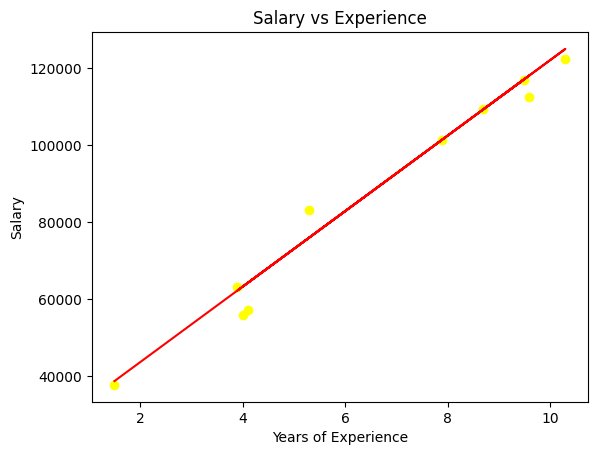

In [19]:
def main():
    ## need to import a dataset for out work at first
    df = pd.read_csv("salary_data.csv")
    ## the dataset contains two cols, first showing the years of experience and second showing the salary
    X = df.iloc[:,:-1]
    Y = df.iloc[:,1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 )

    ## Next we need to train the model and and for that, we need to write the functions
    model = LinReg( iterations = 500, learning_rate = 0.01 ) 
  
    model.fit( X_train, Y_train ) 
      
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )  
      
    print( "Real values      ", Y_test[:3] ) 
      
    # Visualization on test set        
    plt.scatter( X_test, Y_test, color = 'yellow' )       
    plt.plot( X_test, Y_pred, color = 'red' )       
    plt.title( 'Salary vs Experience' )       
    plt.xlabel( 'Years of Experience' )       
    plt.ylabel( 'Salary' )       
    plt.show() 
     
if __name__ == "__main__" :        
    main()
    
    